In [20]:
import time

import numpy as np

import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

In [21]:
rng = np.random.RandomState(0)

In [22]:
# Generate sample data
X = 15 * rng.rand(100, 1)
y = np.sin(X).ravel()
y += 3 * (0.5 - rng.rand(X.shape[0]))  # add noise

In [24]:
X.shape

(100, 1)

In [25]:
y.shape

(100,)

In [6]:
gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) \
    + WhiteKernel(1e-1)
gp_kernel

ExpSineSquared(length_scale=1, periodicity=5) + WhiteKernel(noise_level=0.1)

In [7]:
gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=ExpSineSquared(length_scale=1, periodicity=5) + WhiteKernel(noise_level=0.1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [8]:
gpr.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=ExpSineSquared(length_scale=1, periodicity=5) + WhiteKernel(noise_level=0.1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [10]:
X_plot = np.linspace(0, 20, 10000)[:, None]
y_gpr = gpr.predict(X_plot, return_std=False)
y_gpr

array([-0.26605204, -0.26336428, -0.2606769 , ...,  0.92085851,
        0.92097103,  0.92108025])

In [11]:
y_gpr, y_std = gpr.predict(X_plot, return_std=True)
y_gpr

array([-0.26605204, -0.26336428, -0.2606769 , ...,  0.92085851,
        0.92097103,  0.92108025])

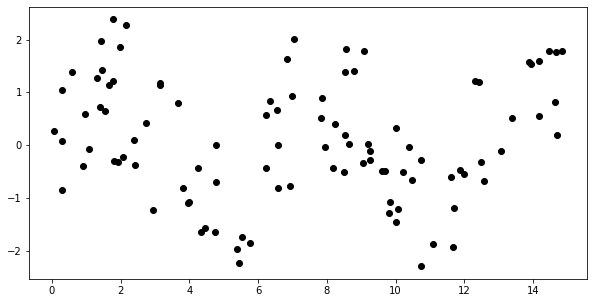

In [14]:
# Plot results
plt.figure(figsize=(10, 5))
lw = 2
plt.scatter(X, y, c='k', label='data')

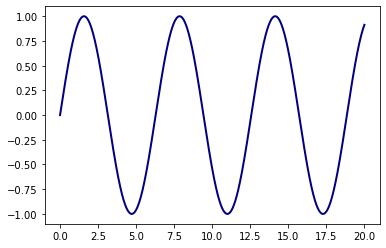

In [15]:
plt.plot(X_plot, np.sin(X_plot), color='navy', lw=lw, label='True')

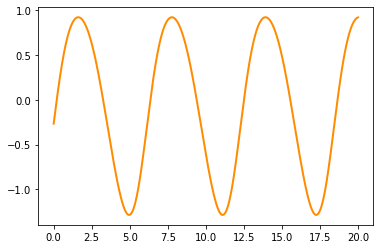

In [16]:
plt.plot(X_plot, y_gpr, color='darkorange', lw=lw,
         label='GPR (%s)' % gpr.kernel_)

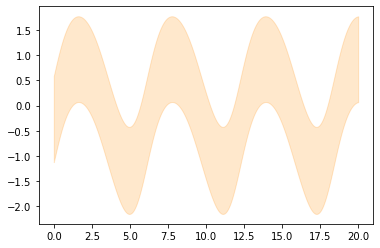

In [18]:
plt.fill_between(X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='darkorange',
                 alpha=0.2)

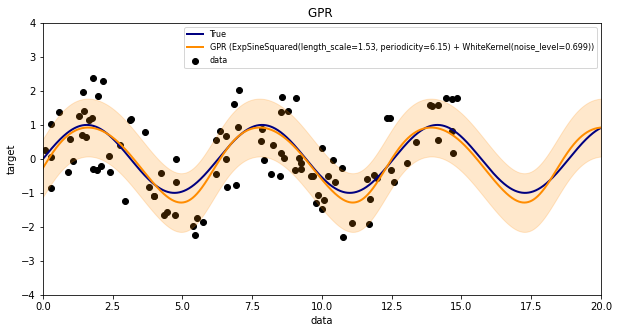

In [19]:
plt.figure(figsize=(10, 5))
lw = 2

plt.scatter(X, y, c='k', label='data')
plt.plot(X_plot, np.sin(X_plot), color='navy', lw=lw, label='True')
plt.plot(X_plot, y_gpr, color='darkorange', lw=lw,
         label='GPR (%s)' % gpr.kernel_)

plt.fill_between(X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='darkorange',
                 alpha=0.2)


plt.xlabel('data')
plt.ylabel('target')
plt.xlim(0, 20)
plt.ylim(-4, 4)
plt.title('GPR ')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()